In [50]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy import optimize

In [51]:
np.random.seed(42)

alpha = np.random.rand(1)
beta = np.random.rand(1)

print(alpha, beta)

x = np.linspace(0, 1, 101)
yk = alpha * x + beta + np.random.randn(101)

def linear_approx(x, a, b):
    def linear(x, a, b):
        return a*x + b
    return np.array(list(map(partial(linear, a=a, b=b), x)))


def rational_approx(x, a, b):
    def rational(x, a, b):
        denominator = 1 + x * b
        return a / denominator
    return np.array(list(map(partial(rational, a=a, b=b), x)))


def cost_func(params, gt, x, func_name):
    a, b = params
    if func_name == 'linear':
        return sum((gt - linear_approx(x, a, b))**2)

    value = sum((gt - rational_approx(x, a, b))**2)
    return value

def cost_func_vect(params, gt, x, func_name):
    a, b = params
    if func_name == 'linear':
        return (gt - linear_approx(x, a, b))

    value = (gt - rational_approx(x, a, b))
    return value

eps = 0.0001


[0.37454012] [0.95071431]


a = 0.4296, b = 0.7913, num iters = 214, num func calls = 214
     fun: 83.07382697914983
     jac: array([1.90734863e-06, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([0.43877717, 0.79065684])
      fun: 83.07382697914987
 hess_inv: array([[ 0.05824099, -0.02912041],
       [-0.02912041,  0.01951066]])
      jac: array([-1.90734863e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.43877722, 0.79065681])
 active_mask: array([0, 0])
        cost: 41.5369134895749
         fun: array([ 0.80774598,  1.68244492, -0.07538068, -0.07600663,  1.73670077,
        0.92428032, -0.31327117,  0.69812089, -0.30849922, -0.31145365,
        0.39559601, -1.76028888, -1.57256884, -0.4105809 , -0.86176686,
        0.46466922, -0.75824456, -1.26316656,  1.61414354, -0.0779239 ,
        0.214738

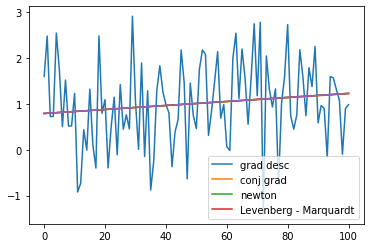

In [66]:
def gradient_descent(x, y, func, eps):
    a, b = 0, 0
    lr = 1e-2
    iters = 0
    fcalls = 0
    while True:
        prev_a, prev_b = a, b
        if func == 'linear':
            a = a - lr * (-2) / len(x) * sum(x * (y - a * x - b))
            b = b - lr * (-2) / len(x) * sum(y - a * x - b)
        elif func == 'rational':
            a = a - lr * (-2/len(x)) * sum((-a + b * x * y + y) / (b*x + 1)**2)
            b = b - lr * (-2)/len(x) * sum(a * x * (a - y * (b*x + 1)) / (b * x + 1) ** 3)
        iters += 1
        fcalls += 1
        if ((a - prev_a) ** 2 + (b - prev_b) ** 2) ** 0.5 < eps:
            break

    return a, b, iters, fcalls


params_grad_des = gradient_descent(x, yk, 'linear', eps)
print('a = {:.4f}, b = {:.4f}, num iters = {}, num func calls = {}'.format(*params_grad_des))
params_conj_grad = optimize.minimize(cost_func, [0, 0], args=(yk, x, 'linear'), method='CG', tol=eps)
print(params_conj_grad)
params_newton = optimize.minimize(cost_func, [0, 0], args=(yk, x, 'linear'), method='BFGS', tol=eps)
print(params_newton)
params_lm = optimize.least_squares(cost_func_vect, [0, 0], args=(yk, x, 'linear'), method='lm', xtol=eps)
print(params_lm)
plt.plot(yk)
plt.plot(linear_approx(x, *params_grad_des[0:2]))
plt.plot(linear_approx(x, *params_conj_grad.x))
plt.plot(linear_approx(x, *params_newton.x))
plt.plot(linear_approx(x, *params_lm.x))
plt.legend(['grad desc', 'conj grad', 'newton', 'Levenberg - Marquardt'])


a = 0.8515, b = -0.3025, num iters = 445, num func calls = 445
****************************************************************************************************
     fun: 83.16368035899251
     jac: array([ 2.86102295e-05, -9.53674316e-06])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 9
    njev: 27
  status: 0
 success: True
       x: array([ 0.83266203, -0.33000681])
****************************************************************************************************
      fun: 83.16368035899146
 hess_inv: array([[0.01210227, 0.0140557 ],
       [0.0140557 , 0.02248319]])
      jac: array([-1.90734863e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 10
     njev: 14
   status: 0
  success: True
        x: array([ 0.83266181, -0.33000702])
****************************************************************************************************
 active_mask: array([0, 0])
        cost: 41.5818401799209
         

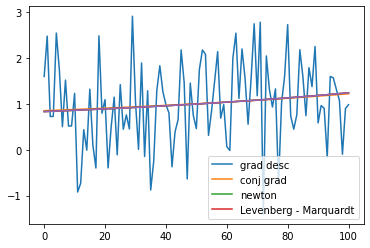

In [67]:

rational_params_grad_des = gradient_descent(x, yk, 'rational', eps)
print('a = {:.4f}, b = {:.4f}, num iters = {}, num func calls = {}'.format(*rational_params_grad_des))
print('*' * 100)
rational_params_conj_grad = optimize.minimize(cost_func, [0, 0], args=(yk, x, 'rational'), method='CG', tol=eps)
print(rational_params_conj_grad)
print('*' * 100)
rational_params_newton = optimize.minimize(cost_func, [0, 0], args=(yk, x, 'rational'), method='BFGS', tol=eps)
print(rational_params_newton)
print('*' * 100)
rational_params_lm = optimize.least_squares(cost_func_vect, [0, 0], args=(yk, x, 'rational'), method='lm', xtol=eps)
print(rational_params_lm)
plt.plot(yk)
plt.plot(rational_approx(x, *rational_params_grad_des[0:2]))
plt.plot(rational_approx(x, *rational_params_conj_grad.x))
plt.plot(rational_approx(x, *rational_params_newton.x))
plt.plot(rational_approx(x, *rational_params_lm.x))
plt.legend(['grad desc', 'conj grad', 'newton', 'Levenberg - Marquardt'])
